# Тема проекта "Analysis and study of the notebook specification dataset"

Анализ и изучение датасета о спецификации ноутбуков

# Описание проекта

В данном проекте изучается и анализируется датасет "All Laptops with Specifications Dataset", в котором содержится информация о производителе ноутбука, модели, типе, размере экрана, разрешении экрана, процессоре, оперативной памяти, твердотельном или жестком диске, графическом процессоре, операционной системе, весе и цене. Для анализа использовался язык Python и библиотеки NumPy, Pandas, Mathplotlob и Seaborn.

# Цели и задачи проекта

#### Цели:
* Сравнение характеристик: Исследование различных характеристик ноутбуков между брендами и моделями.
* Определение классификаций: Анализ спецификаций ноутбуков.
* Прогнозирование цен: Построить модель для прогнозирования стоимости.

#### Задачи:
* Подготовка данных: Очистка и структурирование датасета.
* Визуализация: Создание графиков для наглядного представления характеристик.
* Статистический анализ: Выявление корреляций между характеристиками и ценами.

# Предобработка данных

## 1. Загрузка файла с данными и изучение общей информации

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
lt = pd.read_csv('laptop_price.csv', encoding='latin-1')

In [6]:
lt

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [7]:
lt.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [8]:
lt.tail()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.0
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.0
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.0
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.0
1302,1320,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,369.0


In [9]:
lt.sample(7)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
1040,1054,Lenovo,Yoga 500-15ISK,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,847.00
466,473,Acer,Aspire 5,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4GB,500GB HDD,Nvidia GeForce GTX 940MX,Windows 10,2.2kg,469.00
898,910,Dell,Vostro 3568,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M420X,Windows 10,2.18kg,614.00
1045,1059,HP,EliteBook 850,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD + 500GB HDD,Intel HD Graphics 520,Windows 10,1.84kg,2103.34
1042,1056,Toshiba,Tecra A50-C-218,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,16GB,256GB SSD,Nvidia GeForce 930M,Windows 10,2.4kg,1425.00
171,175,HP,17-bs001nv (i5-7200U/6GB/2TB/Radeon,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,6GB,2TB HDD,AMD Radeon 520,Windows 10,2.71kg,699.00
261,266,Lenovo,IdeaPad 320-15ISK,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,256GB SSD,Intel HD Graphics 520,No OS,2.2kg,444.00


In [10]:
lt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_in_euros    1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [11]:
lt.columns.tolist()

['laptop_ID',
 'Company',
 'Product',
 'TypeName',
 'Inches',
 'ScreenResolution',
 'Cpu',
 'Ram',
 'Memory',
 'Gpu',
 'OpSys',
 'Weight',
 'Price_in_euros']

In [12]:
lt.count()

,0
laptop_ID,1303
Company,1303
Product,1303
TypeName,1303
Inches,1303
ScreenResolution,1303
Cpu,1303
Ram,1303
Memory,1303
Gpu,1303


### **Выводы**

В датасете содержится информацию о 1303 различных ноутбуках.
1. **laptop_ID**: Уникальный идентификатор ноутбука в датасете.
2. **Company**: Производитель ноутбука (например, Dell, HP, Lenovo и т. д.).
3. **Product**: Название или модель ноутбука.
4. **TypeName**: Тип ноутбука (например, Ultrabook, Gaming, Netbook и т. д.).
5. **Inches**: Размер дисплея в дюймах.
6. **ScreenResolution**: Разрешение экрана (например, 1920x1080, 1366x768 и т. д.).
7. **Cpu**: Информация о процессоре (модель, частота и т. д.).
8. **Ram**: Объем оперативной памяти (например, 8 ГБ, 16 ГБ и т. д.).
9. **Memory**: Объем встроенной памяти (например, 256 ГБ SSD, 1 ТБ HDD и т. д.).
10. **Gpu**: Графический процессор (например, NVIDIA GeForce GTX 1050, Intel HD Graphics и т. д.).
11. **OpSys**: Операционная система (например, Windows 10, macOS, Linux и т. д.).
12. **Weight**: Вес ноутбука в килограммах.
13. **Price_in_euros**: Стоимость ноутбука в евро.

* В датафрейме **1303 записи**, **13 столбцов**, в памяти он занимает **132,5 кб**.
* Пропущенных значений в датасете нет.
* Нарушение названия в заголовке столбца **laptop_ID** и **Weight**, следует испраить нарушение регистра.
* Для столбца **Weight** возможно изменение типа данных, чтобы оптимизировать нагрузки и упростить анализ данных.

## 2. Переименование неправильного наименования столбцов

In [13]:
lt.rename(columns = {'laptop_ID': 'Laptop_ID'}, inplace = True)
lt.rename(columns = {'Weight': 'Weight(kg)'}, inplace = True)
lt

,Laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight(kg),Price_in_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


## 3. Исправление некорректного значения столбцов

In [14]:
print(lt['Weight(kg)'].unique())

['1.37kg' '1.34kg' '1.86kg' '1.83kg' '2.1kg' '2.04kg' '1.3kg' '1.6kg'
 '2.2kg' '0.92kg' '1.22kg' '0.98kg' '2.5kg' '1.62kg' '1.91kg' '2.3kg'
 '1.35kg' '1.88kg' '1.89kg' '1.65kg' '2.71kg' '1.2kg' '1.44kg' '2.8kg'
 '2kg' '2.65kg' '2.77kg' '3.2kg' '0.69kg' '1.49kg' '2.4kg' '2.13kg'
 '2.43kg' '1.7kg' '1.4kg' '1.8kg' '1.9kg' '3kg' '1.252kg' '2.7kg' '2.02kg'
 '1.63kg' '1.96kg' '1.21kg' '2.45kg' '1.25kg' '1.5kg' '2.62kg' '1.38kg'
 '1.58kg' '1.85kg' '1.23kg' '1.26kg' '2.16kg' '2.36kg' '2.05kg' '1.32kg'
 '1.75kg' '0.97kg' '2.9kg' '2.56kg' '1.48kg' '1.74kg' '1.1kg' '1.56kg'
 '2.03kg' '1.05kg' '4.4kg' '1.90kg' '1.29kg' '2.0kg' '1.95kg' '2.06kg'
 '1.12kg' '1.42kg' '3.49kg' '3.35kg' '2.23kg' '4.42kg' '2.69kg' '2.37kg'
 '4.7kg' '3.6kg' '2.08kg' '4.3kg' '1.68kg' '1.41kg' '4.14kg' '2.18kg'
 '2.24kg' '2.67kg' '2.14kg' '1.36kg' '2.25kg' '2.15kg' '2.19kg' '2.54kg'
 '3.42kg' '1.28kg' '2.33kg' '1.45kg' '2.79kg' '1.84kg' '2.6kg' '2.26kg'
 '3.25kg' '1.59kg' '1.13kg' '1.78kg' '1.10kg' '1.15kg' '1.27kg' '1.43kg

Во всех значениях прописана мера измерения 'kg', её нужно убрать

In [15]:
lt = lt.applymap(lambda x: x.replace('kg', '') if isinstance(x, str) else x)
print(lt['Weight(kg)'].unique())

['1.37' '1.34' '1.86' '1.83' '2.1' '2.04' '1.3' '1.6' '2.2' '0.92' '1.22'
 '0.98' '2.5' '1.62' '1.91' '2.3' '1.35' '1.88' '1.89' '1.65' '2.71' '1.2'
 '1.44' '2.8' '2' '2.65' '2.77' '3.2' '0.69' '1.49' '2.4' '2.13' '2.43'
 '1.7' '1.4' '1.8' '1.9' '3' '1.252' '2.7' '2.02' '1.63' '1.96' '1.21'
 '2.45' '1.25' '1.5' '2.62' '1.38' '1.58' '1.85' '1.23' '1.26' '2.16'
 '2.36' '2.05' '1.32' '1.75' '0.97' '2.9' '2.56' '1.48' '1.74' '1.1'
 '1.56' '2.03' '1.05' '4.4' '1.90' '1.29' '2.0' '1.95' '2.06' '1.12'
 '1.42' '3.49' '3.35' '2.23' '4.42' '2.69' '2.37' '4.7' '3.6' '2.08' '4.3'
 '1.68' '1.41' '4.14' '2.18' '2.24' '2.67' '2.14' '1.36' '2.25' '2.15'
 '2.19' '2.54' '3.42' '1.28' '2.33' '1.45' '2.79' '1.84' '2.6' '2.26'
 '3.25' '1.59' '1.13' '1.78' '1.10' '1.15' '1.27' '1.43' '2.31' '1.16'
 '1.64' '2.17' '1.47' '3.78' '1.79' '0.91' '1.99' '4.33' '1.93' '1.87'
 '2.63' '3.4' '3.14' '1.94' '1.24' '4.6' '4.5' '2.73' '1.39' '2.29' '2.59'
 '2.94' '1.14' '3.8' '3.31' '1.09' '3.21' '1.19' '1.98' '1.17' '4.3

<ipython-input-15-a15196f32570>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  lt = lt.applymap(lambda x: x.replace('kg', '') if isinstance(x, str) else x)


## 4. Изменение типов данных

In [16]:
lt.dtypes

,0
Laptop_ID,int64
Company,object
Product,object
TypeName,object
Inches,float64
ScreenResolution,object
Cpu,object
Ram,object
Memory,object
Gpu,object


Для столбца Weight(kg) нужно заменить тип данных на float

In [17]:
lt['Weight(kg)'] = lt['Weight(kg)'].astype(float)
lt.dtypes

,0
Laptop_ID,int64
Company,object
Product,object
TypeName,object
Inches,float64
ScreenResolution,object
Cpu,object
Ram,object
Memory,object
Gpu,object


Теперь типы данных заданы верно и не требуют изменений

## 5. Поиск дубликатов

In [18]:
print('Кол-во дубликатов:', lt.duplicated().sum())

Кол-во дубликатов: 0


## Выводы к разделу 1

После изучения датасета **All Laptops with Specifications Dataset** были выявлены ошибки, после которых было сделано:
* Название столбца **Laptop_ID** с большой буквы
* Дополнение названия столбца **Weight** на **Weight(kg)**
* Изменение типа данных в столбце **Weight(kg)**

Датафрейм исправлен и оптимизирован для дальнейшего анализа


# Исследовательский анализ данных

## 1. Индексация (по координатам, логическая)

In [19]:
lt.loc[878]

,878
Laptop_ID,889
Company,Dell
Product,Vostro 5568
TypeName,Notebook
Inches,15.6
ScreenResolution,Full HD 1920x1080
Cpu,Intel Core i5 7200U 2.5GHz
Ram,4GB
Memory,128GB SSD + 1TB HDD
Gpu,Nvidia GeForce 940MX


In [20]:
lt.loc[450:465]

,Laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight(kg),Price_in_euros
450,457,HP,15-bs024nv (i5-7200U/8GB/128GB/W10),Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8GB,128GB SSD,Intel HD Graphics 620,Windows 10,1.910,589.0
451,458,Dell,Precision 3520,Workstation,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6820HQ 2.7GHz,16GB,256GB SSD,Nvidia Quadro M620,Windows 10,2.170,1975.0
452,459,HP,ProBook 650,Workstation,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7820HQ 2.9GHz,8GB,512GB SSD,Intel HD Graphics 620,Windows 10,2.310,1534.0
453,460,Lenovo,ThinkPad T470,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.650,1345.0
454,461,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,128GB SSD + 1TB HDD,AMD Radeon 530,Windows 10,2.360,979.0
455,462,Dell,Inspiron 3168,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Pentium Quad Core N3710 1.6GHz,4GB,500GB HDD,Intel HD Graphics 405,Windows 10,1.470,479.0
456,463,Dell,Alienware 17,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.7GHz,8GB,1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.420,2046.0
457,464,Microsoft,Surface Laptop,Ultrabook,13.5,Touchscreen 2256x1504,Intel Core M m3-7Y30 2.2GHz,4GB,128GB SSD,Intel HD Graphics 615,Windows 10 S,1.252,989.0
458,465,Microsoft,Surface Laptop,Ultrabook,13.5,Touchscreen 2256x1504,Intel Core i7 7660U 2.5GHz,8GB,256GB SSD,Intel Iris Plus Graphics 640,Windows 10 S,1.250,1799.0
459,466,HP,17-BS092ND (i3-6006U/8GB/256GB/W10),Notebook,17.3,1600x900,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,2.500,639.9


In [21]:
lt.loc[689, 'Company']

'Lenovo'

In [22]:
lt.loc[234:245, ['Company', 'Product']]

,Company,Product
234,Acer,Aspire R7
235,Dell,Inspiron 5567
236,Acer,Aspire A315-51
237,Asus,X555QG-DM242T (A10-9620P/4GB/1TB
238,Asus,ROG G703VI-E5062T
239,Acer,Nitro AN515-51
240,Lenovo,IdeaPad 320-15ISK
241,Asus,VivoBook Pro
242,Asus,F756UX-T4201D (i7-7500U/8GB/128GB
243,Dell,Inspiron 5577


In [23]:
lt.loc[597:603, 'Company':'Inches']

,Company,Product,TypeName,Inches
597,Lenovo,Thinkpad T470p,Notebook,14.0
598,Dell,Latitude 5289,2 in 1 Convertible,12.5
599,Dell,Precision 3520,Workstation,15.6
600,HP,EliteBook 850,Notebook,15.6
601,HP,ProBook 450,Notebook,15.6
602,Acer,Aspire 1,Notebook,14.0
603,MSI,Laptop MSI,Gaming,17.3


In [24]:
lt.loc[lt.loc[:, 'Company'] == 'HP']

,Laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight(kg),Price_in_euros
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
10,11,HP,250 G6,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,No OS,1.86,393.90
11,12,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,500GB HDD,Intel HD Graphics 520,No OS,1.86,344.99
22,23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,No OS,1.86,258.00
24,25,HP,15-BS101nv (i7-8550U/8GB/256GB/FHD/W10),Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.91,659.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,1300,HP,Stream 11-Y000na,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17,209.00
1287,1305,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00
1294,1312,HP,Pavilion 15-AW003nv,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04,549.99
1296,1314,HP,Stream 11-Y000na,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17,209.00


## Поиск ноутбуков с диагональю экрана больше **15** дюймов

In [25]:
lt.loc[lt.loc[:, 'Inches'] > 15]

,Laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight(kg),Price_in_euros
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.10,400.00
6,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,2139.97
10,11,HP,250 G6,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,No OS,1.86,393.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,1312,HP,Pavilion 15-AW003nv,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04,549.99
1295,1313,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.30,805.99
1297,1315,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,720.32
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00


Поиск ноутбуков от производителя **Asus** и **без предустановленной ОС**

In [26]:
lt.loc[(lt.loc[:, 'Company'] == 'Asus') & (lt.loc[:, 'OpSys'] == 'No OS')]

,Laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight(kg),Price_in_euros
242,247,Asus,F756UX-T4201D (i7-7500U/8GB/128GB,Notebook,17.3,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 950M,No OS,2.69,889.0
643,651,Asus,ROG GL553VE-FY022,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,1TB HDD,Nvidia GeForce GTX 1050 Ti,No OS,2.50,1169.0
752,761,Asus,X550VX-XX015D (i5-6300HQ/4GB/1TB/GeForce,Notebook,15.6,1366x768,Intel Core i5 6300HQ 2.3GHz,4GB,1TB HDD,Nvidia GeForce GTX 950M,No OS,2.45,579.0
1061,1075,Asus,Rog G752VL-GC088D,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 965M,No OS,4.00,998.0


## 2. Сортировка данных

In [27]:
lt_price = lt.sort_values(by='Price_in_euros', ascending=False)
lt_price

,Laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight(kg),Price_in_euros
196,200,Razer,Blade Pro,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32GB,1TB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49,6099.0
830,839,Razer,Blade Pro,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32GB,512GB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49,5499.0
610,617,Lenovo,Thinkpad P51,Notebook,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Xeon E3-1535M v6 3.1GHz,32GB,1TB SSD,Nvidia Quadro M2200M,Windows 10,2.50,4899.0
749,758,HP,Zbook 17,Workstation,17.3,IPS Panel Full HD 1920x1080,Intel Xeon E3-1535M v5 2.9GHz,16GB,256GB SSD,Nvidia Quadro M2000M,Windows 7,3.00,4389.0
1066,1081,Asus,ROG G701VO,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,64GB,1TB SSD,Nvidia GeForce GTX 980,Windows 10,3.58,3975.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,295,Acer,Chromebook C910-C2ST,Notebook,15.6,1366x768,Intel Celeron Dual Core 3205U 1.5GHz,2GB,16GB SSD,Intel HD Graphics,Chrome OS,2.19,199.0
31,32,Asus,E402WA-GA010T (E2-6110/2GB/32GB/W10),Notebook,14.0,1366x768,AMD E-Series E2-6110 1.5GHz,2GB,32GB Flash Storage,AMD Radeon R2,Windows 10,1.65,199.0
1120,1135,Vero,V131 (X5-Z8350/4GB/32GB/FHD/W10),Notebook,13.3,Full HD 1920x1080,Intel Atom X5-Z8350 1.44GHz,4GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.35,196.0
20,21,Asus,Vivobook E200HA,Netbook,11.6,1366x768,Intel Atom x5-Z8350 1.44GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,0.98,191.9


In [28]:
lt_inches = lt.sort_values(by='Inches', ascending=True)
lt_inches

,Laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight(kg),Price_in_euros
1114,1129,Lenovo,Yoga Book,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4GB,64GB Flash Storage,Intel HD Graphics 400,Android,0.69,549.00
1126,1141,Lenovo,Yoga Book,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4GB,64GB Flash Storage,Intel HD Graphics 400,Windows 10,0.69,479.00
1082,1097,Lenovo,Yoga Book,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4GB,64GB Flash Storage,Intel HD Graphics 400,Windows 10,0.69,646.27
50,51,Lenovo,Yoga Book,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4GB,64GB Flash Storage,Intel HD Graphics 400,Android,0.69,319.00
944,958,Lenovo,Yoga 700-11ISK,2 in 1 Convertible,11.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core M m7-6Y75 1.2GHz,8GB,256GB SSD,Intel HD Graphics 515,Windows 10,1.10,1299.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,1144,HP,Omen -,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 6300HQ 2.3GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,3.35,1129.00
578,585,MSI,GT73VR Titan,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7820HK 2.9GHz,16GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.14,2729.00
257,262,HP,Envy 17-U275cl,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,1TB HDD,Nvidia GeForce MX150,Windows 10,2.90,1059.00
1136,1151,HP,ZBook 17,Workstation,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,256GB SSD,Nvidia Quadro M3000M,Windows 7,3.00,3949.40


In [29]:
sorted(lt.Company, reverse = True)[5]

'Vero'

In [30]:
sorted(lt.OpSys)[3]

'Chrome OS'

In [31]:
sorted(lt.TypeName, reverse = True)[0:11]

['Workstation',
 'Workstation',
 'Workstation',
 'Workstation',
 'Workstation',
 'Workstation',
 'Workstation',
 'Workstation',
 'Workstation',
 'Workstation',
 'Workstation']

## После проведения сортировки можно сделать такие выводы:
* Цена самого дорогого ноутбука составляет 6099 евро, а самый дешёвый - 174 евро
* Самая маленькая диагональ ноутбука составляет 10.4 дюйма, а самая большая - 18.4 дюйма
* Пятая компания по алфавитному порядку в обратном порядке является Vero
* Третья ОС по алфавитному порядку является Chrome OS
* Первые 10 типов ноутбуков по алфавитному порядку с конца являются Workstation

## 3. Фильтрация данных

In [32]:
lt.query("Company == 'Dell' and TypeName == 'Ultrabook'").dropna()

,Laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight(kg),Price_in_euros
19,20,Dell,XPS 13,Ultrabook,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,128GB SSD,Intel UHD Graphics 620,Windows 10,1.22,979.00
28,29,Dell,Latitude 5590,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 8650U 1.9GHz,8GB,256GB SSD + 256GB SSD,Intel UHD Graphics 620,Windows 10,1.88,1298.00
33,34,Dell,XPS 13,Ultrabook,13.3,Touchscreen / Quad HD+ 3200x1800,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Intel UHD Graphics 620,Windows 10,1.20,1869.00
61,62,Dell,Vostro 5471,Ultrabook,14.0,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.70,879.00
71,73,Dell,Inspiron 5370,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,1.40,955.00
80,82,Dell,Latitude 5590,Ultrabook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.88,1096.16
89,91,Dell,XPS 13,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.21,1649.00
111,114,Dell,XPS 13,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7560U 2.4GHz,8GB,256GB SSD,Intel Iris Plus Graphics 640,Windows 10,1.23,1379.00
114,117,Dell,XPS 13,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.21,1629.00
181,185,Dell,XPS 13,Ultrabook,13.3,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.23,1399.00


In [33]:
lt.query("Price_in_euros < 1000")

,Laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight(kg),Price_in_euros
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.10,400.00
9,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.60,770.00
10,11,HP,250 G6,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,No OS,1.86,393.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,1315,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,720.32
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00


In [34]:
lt.query("Company == 'Apple' and OpSys == 'macOS'").dropna()

,Laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight(kg),Price_in_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60
7,8,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,1158.70
12,13,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.8GHz,16GB,256GB SSD,AMD Radeon Pro 555,macOS,1.83,2439.97
14,15,Apple,"MacBook 12""",Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core M m3 1.2GHz,8GB,256GB SSD,Intel HD Graphics 615,macOS,0.92,1262.40
15,16,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,256GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1518.55
17,18,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.9GHz,16GB,512GB SSD,AMD Radeon Pro 560,macOS,1.83,2858.00
45,46,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.0GHz,8GB,256GB SSD,Intel Iris Graphics 540,macOS,1.37,1419.00


In [35]:
lt.query("TypeName == 'Netbook'").dropna()

,Laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight(kg),Price_in_euros
20,21,Asus,Vivobook E200HA,Netbook,11.6,1366x768,Intel Atom x5-Z8350 1.44GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,0.98,191.9
376,382,Lenovo,Yoga 11e,Netbook,11.6,IPS Panel 1366x768,Intel Celeron Quad Core N3450 1.1GHz,4GB,128GB SSD,Intel HD Graphics 500,Windows 10,1.59,553.0
430,437,Samsung,Chromebook 3,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.15,269.0
461,468,Acer,TravelMate B,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,128GB SSD,Intel HD Graphics 400,Windows 10,1.40,435.0
500,507,Asus,VivoBook E201NA,Netbook,11.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4GB,64GB Flash Storage,Intel HD Graphics 500,Windows 10 S,1.20,340.0
504,511,Lenovo,Chromebook N23,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,16GB SSD,Intel HD Graphics 400,Chrome OS,1.25,265.0
515,522,Asus,VivoBook E12,Netbook,11.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,2GB,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.10,245.0
584,591,Dell,Chromebook 11,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.26,295.0
695,703,Acer,TravelMate B117-M,Netbook,11.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,32GB Flash Storage,Intel HD Graphics,Windows 10,1.40,269.0
750,759,Lenovo,N23 (N3060/4GB/128GB/W10),Netbook,11.6,Touchscreen 1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,128GB SSD,Intel HD Graphics 400,Windows 10,1.40,475.0


In [36]:
lt.where((lt['Company'] == 'HP') | (lt['TypeName'] == 'Ultrabook')).dropna()

,Laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight(kg),Price_in_euros
0,1.0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2.0,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3.0,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4.0,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5.0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,1305.0,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00
1289,1307.0,Asus,ZenBook UX305CA-UBM1,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows 10,1.20,729.00
1294,1312.0,HP,Pavilion 15-AW003nv,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04,549.99
1296,1314.0,HP,Stream 11-Y000na,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17,209.00


In [37]:
lt.where(lt['Memory'].str.contains('SSD')).dropna()

,Laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight(kg),Price_in_euros
0,1.0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
2,3.0,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4.0,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5.0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60
8,9.0,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.30,1495.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,1302.0,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00
1285,1303.0,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00
1289,1307.0,Asus,ZenBook UX305CA-UBM1,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows 10,1.20,729.00
1298,1316.0,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00


In [38]:
lt.where((lt['Inches'] >= 14) & (lt['Inches'] <= 16)).dropna()

,Laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight(kg),Price_in_euros
2,3.0,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4.0,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
5,6.0,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.10,400.00
6,7.0,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,2139.97
8,9.0,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.30,1495.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,1315.0,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,720.32
1298,1316.0,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00
1300,1318.0,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00
1301,1319.0,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00


In [39]:
lt.where(lt['Weight(kg)'] > 2).dropna()

,Laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight(kg),Price_in_euros
5,6.0,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.10,400.00
6,7.0,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,2139.97
13,14.0,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,256GB SSD,AMD Radeon R5 M430,Windows 10,2.20,498.90
16,17.0,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,AMD Radeon R5 M430,Windows 10,2.20,745.00
18,19.0,Lenovo,IdeaPad 320-15IKB,Notebook,15.6,Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,8GB,1TB HDD,Nvidia GeForce 940MX,No OS,2.20,499.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,1312.0,HP,Pavilion 15-AW003nv,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04,549.99
1295,1313.0,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.30,805.99
1297,1315.0,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,720.32
1301,1319.0,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00


In [40]:
lt.where(lt['ScreenResolution'].str.contains('1920x1080')).dropna()

,Laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight(kg),Price_in_euros
2,3.0,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
8,9.0,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.30,1495.00
9,10.0,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.60,770.00
11,12.0,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,500GB HDD,Intel HD Graphics 520,No OS,1.86,344.99
13,14.0,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,256GB SSD,AMD Radeon R5 M430,Windows 10,2.20,498.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,1302.0,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00
1289,1307.0,Asus,ZenBook UX305CA-UBM1,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows 10,1.20,729.00
1293,1311.0,Lenovo,IdeaPad Y700-15ISK,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.60,899.00
1294,1312.0,HP,Pavilion 15-AW003nv,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04,549.99


## После выполнения фильтрации датасета можно сделать некоторые выводы:
* 682 ноутбука дешевле 1000 Евро
* 843 ноутбука имеют твёрдотельный накопитель (SSD)
* 871 нутбук имеет диагональ экрана от 14 до 16 дюймов включительно
* 672 ноутбука весят более 2 кг
* 841 ноутбук с разрешением Full HD 1920x1080

## 4. Сводные таблицы

In [41]:
# Сводная таблица для среднего значения диагонали экрана (Inches)
pivot_table_inches = pd.pivot_table(lt, index=['Company'], values=['Inches'])
pivot_table_inches


,Inches
Company,
Acer,15.063107
Apple,13.247619
Asus,15.450000
Chuwi,14.500000
Dell,15.136027
Fujitsu,15.600000
Google,12.300000
HP,14.943066
Huawei,13.000000


In [42]:
# Сводная таблица для среднего значения веса (Weight)
pivot_table_weight = pd.pivot_table(lt, index=['Company'], values=['Weight(kg)'])
pivot_table_weight

,Weight(kg)
Company,
Acer,2.166893
Apple,1.320476
Asus,2.220196
Chuwi,1.726667
Dell,2.147040
Fujitsu,2.233333
Google,1.100000
HP,1.911314
Huawei,1.050000


In [43]:
# Сводная таблица для среднего значения стоимости (Price_in_euros)
pivot_table_price = pd.pivot_table(lt, index=['Company'], values=['Price_in_euros'])
pivot_table_price

,Price_in_euros
Company,
Acer,626.775825
Apple,1564.198571
Asus,1104.169367
Chuwi,314.296667
Dell,1186.068990
Fujitsu,729.000000
Google,1677.666667
HP,1067.774854
Huawei,1424.000000


## 5. Группировка данных, агрегатные функции

### Медианная стоимость ноутбуков по компании (топ 30)

In [44]:
# Группировка по компании и вычисление медианной стоимости ноутбуков
median_price_by_company = lt.groupby('Company')['Price_in_euros'].median().sort_values(ascending=False).head(30)
median_price_by_company


,Price_in_euros
Company,
Razer,2899.00
LG,2099.00
Samsung,1649.00
MSI,1599.00
Microsoft,1569.50
Google,1559.00
Huawei,1424.00
Apple,1339.69
Toshiba,1211.50


### Медианный вес ноутбуков по типу оперативной памяти (топ 30)

In [45]:
# Группировка по типу оперативной памяти и вычисление медианного веса ноутбуков
median_weight_by_ram_type = lt.groupby('Ram')['Weight(kg)'].median().sort_values(ascending=False).head(30)
median_weight_by_ram_type


,Weight(kg)
Ram,
32GB,4.40
64GB,3.58
16GB,2.40
24GB,2.24
12GB,2.21
6GB,2.19
4GB,2.03
8GB,1.96
2GB,1.44


### Медианная диагональ экрана ноутбуков по операционной системе (топ 30)

In [46]:
# Группировка по операционной системе и вычисление медианной диагонали экрана
median_inches_by_os = lt.groupby('OpSys')['Inches'].median().sort_values(ascending=False).head(30)
median_inches_by_os


,Inches
OpSys,
Linux,15.6
No OS,15.6
Windows 10,15.6
Windows 7,14.0
Windows 10 S,13.5
macOS,13.3
Chrome OS,12.3
Mac OS X,12.0
Android,10.1


## 6. Поиск закономерностей, варианты решения бизнес-задачи

In [47]:
# Количество ноутбуков каждого производителя
laptop_counts = lt['Company'].value_counts()
laptop_counts

,count
Company,
Dell,297
Lenovo,297
HP,274
Asus,158
Acer,103
MSI,54
Toshiba,48
Apple,21
Samsung,9


In [48]:
# Средняя цена ноутбуков по типам продуктов
average_price_by_type = lt.groupby('TypeName')['Price_in_euros'].mean()
average_price_by_type

,Price_in_euros
TypeName,
2 in 1 Convertible,1282.401653
Gaming,1731.380634
Netbook,636.232000
Notebook,782.078624
Ultrabook,1548.230357
Workstation,2280.358966


In [49]:
inches_counts = lt['Inches'].value_counts()
inches_counts

,count
Inches,
15.6,665
14.0,197
13.3,164
17.3,164
12.5,39
11.6,33
12.0,6
13.5,6
13.9,6


## 7. Выводы к разделу 2

### **1.** Больше всего ноутбуков у производителей **Dell** и **Lenovo**, меньше всего у Huawei

### **2.** Самыми дорогими являются **рабочие станции**, а самыми дешёвыми **нетбуки**

### **3.** Наибольшее количество ноутбуков имеют диагональ экрана **15.6** дюймов, а самый нераспространенные размеры - **11.3, 14.1, 17 и 18.4**

# Графический анализ данных

## 1. Диаграммы, библиотека Matplotlib

## Гистограмма распределения цен

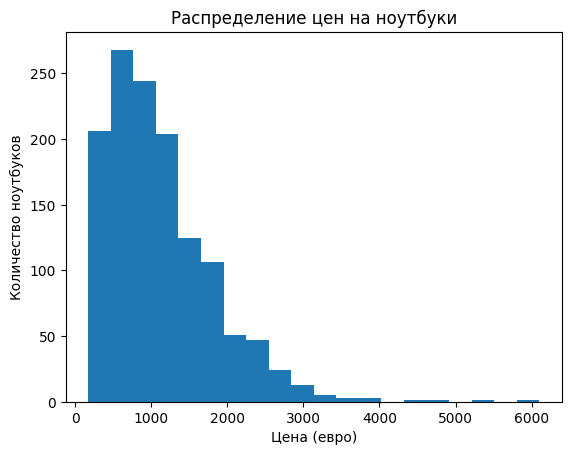

In [51]:
plt.hist(lt['Price_in_euros'], bins=20)
plt.xlabel('Цена (евро)')
plt.ylabel('Количество ноутбуков')
plt.title('Распределение цен на ноутбуки')
plt.show()


## Диаграмма рассеяния: зависимость цены от размера экрана

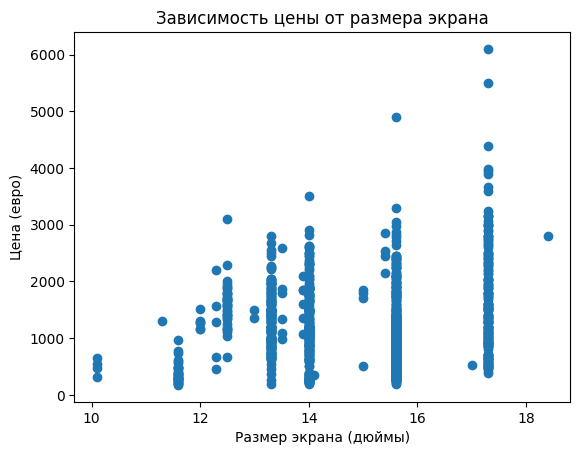

In [52]:
plt.scatter(lt['Inches'], lt['Price_in_euros'])
plt.xlabel('Размер экрана (дюймы)')
plt.ylabel('Цена (евро)')
plt.title('Зависимость цены от размера экрана')
plt.show()


## Распределение ноутбуков по компаниям-производителям

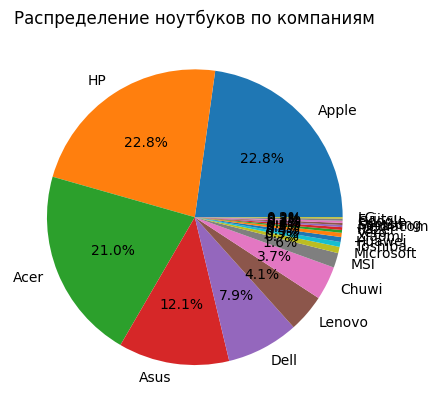

In [53]:
plt.pie(lt['Company'].value_counts(), labels=lt['Company'].unique(), autopct='%1.1f%%')
plt.title('Распределение ноутбуков по компаниям')
plt.show()


## Распределение ноутбуков по типам продуктов

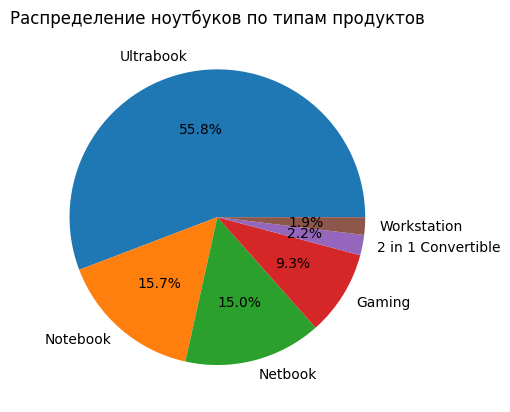

In [54]:
plt.pie(lt['TypeName'].value_counts(), labels=lt['TypeName'].unique(), autopct='%1.1f%%')
plt.title('Распределение ноутбуков по типам продуктов')
plt.show()


### Распределение объёма ОЗУ

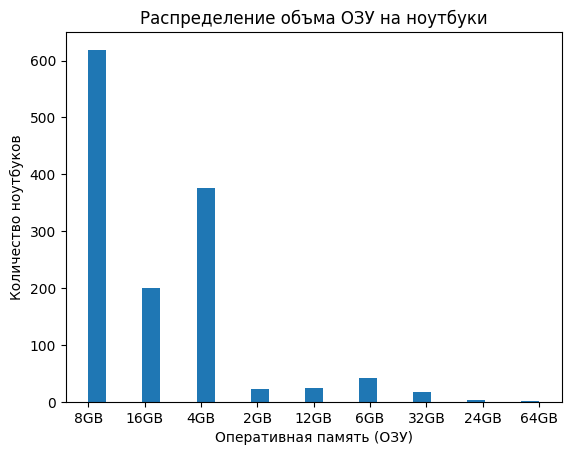

In [81]:
plt.hist(lt['Ram'], bins=25)
plt.xlabel('Оперативная память (ОЗУ)')
plt.ylabel('Количество ноутбуков')
plt.title('Распределение объма ОЗУ на ноутбуки')
plt.show()

## 2. Диаграммы, библиотека Seaborn

## Pairplot для изучения взаимосвязей между числовыми переменными

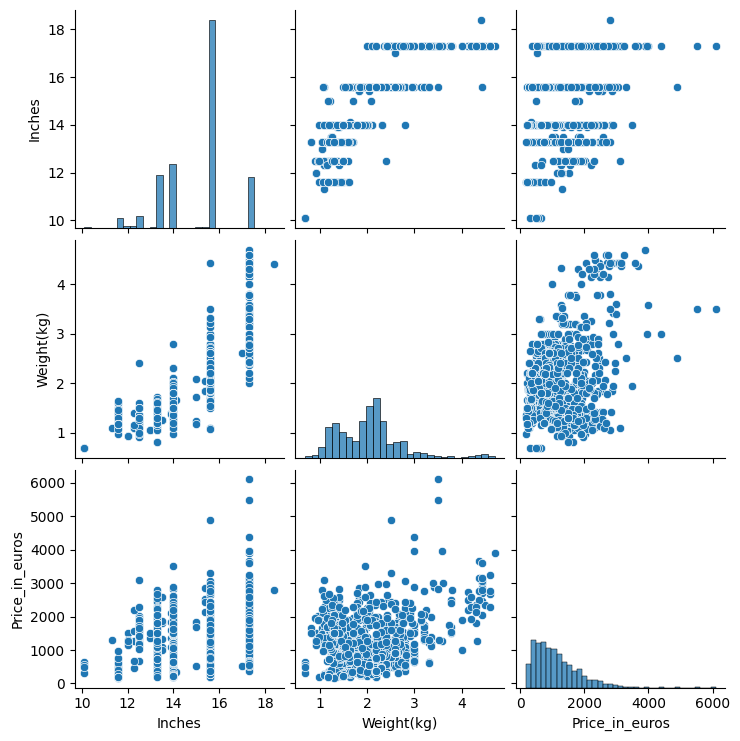

In [82]:
sns.pairplot(lt[['Inches', 'Weight(kg)', 'Price_in_euros']])
plt.show()


## Распределение ноутбуков по процессорам

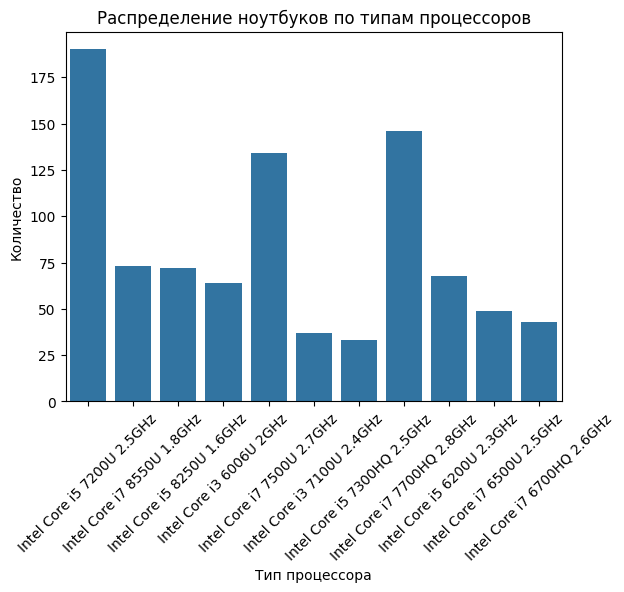

In [74]:
cpu_counts = lt['Cpu'].value_counts()
filtered_cpus = cpu_counts[cpu_counts > 30].index
filtered_lt = lt[lt['Cpu'].isin(filtered_cpus)]

sns.countplot(x='Cpu', data=filtered_lt)
plt.title('Распределение ноутбуков по типам процессоров')
plt.xlabel('Тип процессора')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()


## Сравнение средней цены ноутбуков с разными операционными системами

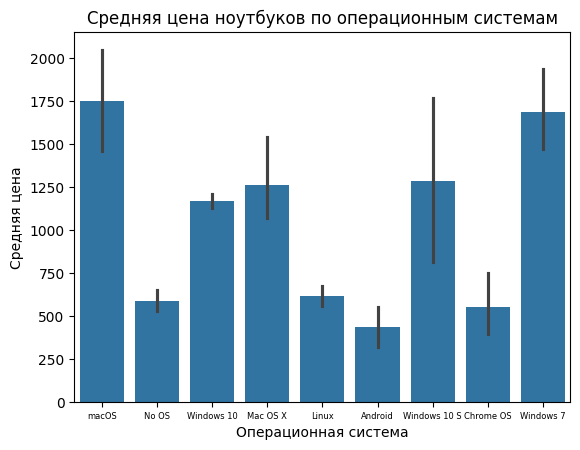

In [66]:
sns.barplot(x='OpSys', y='Price_in_euros', data=lt, estimator=np.mean)
plt.title('Средняя цена ноутбуков по операционным системам')
plt.xlabel('Операционная система')
plt.ylabel('Средняя цена')
plt.xticks(fontsize=6)
plt.show()

### Распределение цен на ноутбуки с разными операционными системами в зависимости от производителя

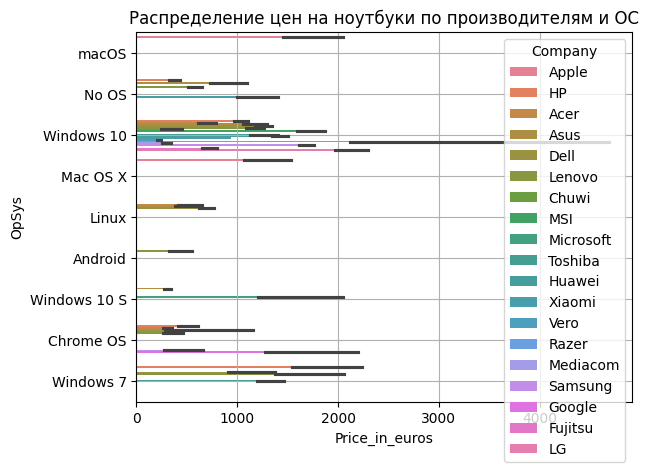

In [75]:
sns.barplot(x='Price_in_euros', y='OpSys', hue='Company', data=lt).grid(True)
plt.title('Распределение цен на ноутбуки по производителям и ОС')
plt.show()


## Распределение ноутбуков по объёму внутренней памяти

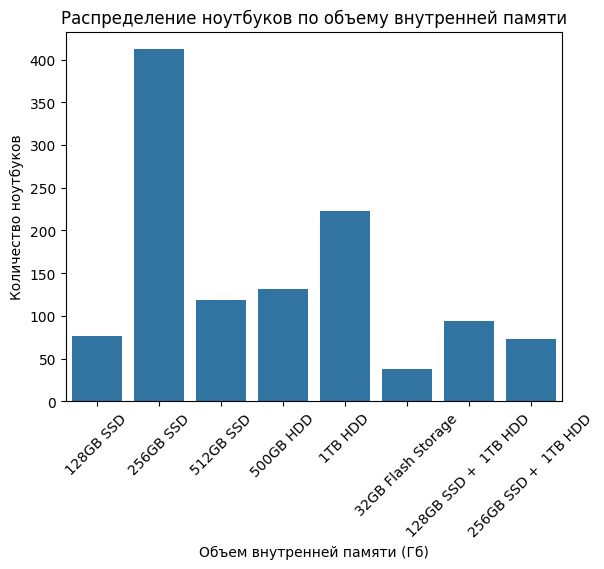

In [77]:
memory_counts = lt['Memory'].value_counts()
filtered_memory = memory_counts[memory_counts > 30].index
filtered_lt = lt[lt['Memory'].isin(filtered_memory)]

sns.countplot(x='Memory', data=filtered_lt)
plt.title('Распределение ноутбуков по объему внутренней памяти')
plt.xlabel('Объем внутренней памяти (Гб)')
plt.ylabel('Количество ноутбуков')
plt.xticks(rotation=45)
plt.show()

## 3. "Портрет" типичного потребителя (вывод к разделу 3)

### После просмотра информации и анализа графиков можно сказать, что средестатистический ноутбук будет:
* произведён компанией HP или Apple
* по классификации будет являться ультрабуком
* в ценовом диапозоне 500-1000 Евро
* с диагональю экрана 15.6 дюймов
* с процессором i5 или i7 7-ого поколения
* с 8 ГБ оперативной памяти и 256 ГБ постоянной памяти
* на операционной системе Windows 10 или MacOS

# Общий вывод по проекту

Мы изучили данные о ноутбуках, нашли ошибки, посмотрели на цены, характеристики, популярные бренды и типы. Нарисовали графики, чтобы лучше понять данные. И составили портрет типичного покупателя.

Эта информация полезна для производителей, чтобы правильно ставить цены, и для покупателей, чтобы выбрать подходящий ноутбук.

Всё это было сделано с помощью языка Python и библиотек NumPy, Pandas, Mathplotlob и Seaborn, а описано всё с помощью языка Markdown и программы Google Colab